# Florence-2-large

In [2]:
%pip install torch
%pip install pillow
%pip install transformers

  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2024.10.0-py3-none-any.whl.metadata (11 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/203.0 MB 419.4 kB/s eta 0:08:03
   ---------------------------------------- 0.5/203.0 MB 419.4 kB/s eta 0:08:03
   ---------------------------------------- 0.8/203.0 MB 541.6 kB/s eta 0:06:14
   ---

In [6]:
%pip install timm
%pip install einops

   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.4 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.4 MB 1.1 MB/s eta 0:00:02
   ------------- -------------------------- 0.8/2.4 MB 1.6 MB/s eta 0:00:01
   ---------------------- ----------------- 1.3/2.4 MB 1.7 MB/s eta 0:00:01
   ------------------------------- -------- 1.8/2.4 MB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.6 MB 4.2 MB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.6 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use

In [1]:
import requests

import torch
from PIL import Image
from transformers import AutoProcessor, AutoModelForCausalLM
from PIL import Image
import matplotlib.pyplot as plt

d:\Bimsara\Anaconda\envs\EVOQ\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

In [2]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

model = AutoModelForCausalLM.from_pretrained("microsoft/Florence-2-large", torch_dtype=torch_dtype, trust_remote_code=True).to(device)
processor = AutoProcessor.from_pretrained("microsoft/Florence-2-large", trust_remote_code=True)

d:\Bimsara\Anaconda\envs\EVOQ\lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


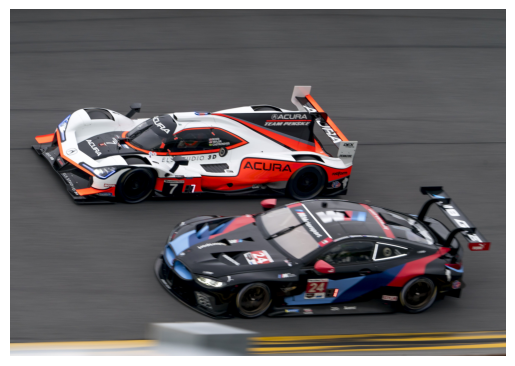

In [3]:
url = "cars.jpg"
image = Image.open(url)

plt.imshow(image)
plt.axis('off')  
plt.show()

### Caption

In [4]:
url = "cars.jpg"
image = Image.open(url)

prompt = "<CAPTION>"

inputs = processor(text=prompt, images=image, return_tensors="pt").to(device, torch_dtype)

generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=4096,
    num_beams=3,
    do_sample=False
)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]

print(generated_text)

</s><s>A couple of cars that are on a race track.</s>


### Detailed Caption

In [5]:
url = "cars.jpg"
image = Image.open(url)

prompt = "<DETAILED_CAPTION>"

inputs = processor(text=prompt, images=image, return_tensors="pt").to(device, torch_dtype)

generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=4096,
    num_beams=3,
    do_sample=False
)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]

print(generated_text)

</s><s>The image shows two Acura NSX GT3 cars racing on a race track, with a blurred background.</s>


### More Detailed Caption

In [20]:
url = "cars.jpg"
image = Image.open(url)

prompt = "<MORE_DETAILED_CAPTION>"

inputs = processor(text=prompt, images=image, return_tensors="pt").to(device, torch_dtype)

generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=4096,
    num_beams=3,
    do_sample=False
)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]

print(generated_text)

</s><s>The image shows two racing cars on a race track. The car on the left is a white and orange Acura sports car with the number 7 on the side and the word "ACURA" written in bold red letters on the front. It has a sleek and aerodynamic design with a low profile and sharp angles, and the car in the foreground is a black and blue sports car. Both cars are moving at a high speed, with the car slightly ahead of the other car. The background is blurred, but it appears to be a racetrack with other cars in motion. The image is taken from a low angle, looking up at the cars.</s>


### Object Detection

In [8]:
prompt = "<OD>"

url = "cars.jpg"
image = Image.open(url)

inputs = processor(text=prompt, images=image, return_tensors="pt").to(device, torch_dtype)

generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=4096,
    num_beams=3,
    do_sample=False
)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]

parsed_answer = processor.post_process_generation(generated_text, task="<OD>", image_size=(image.width, image.height))

print(parsed_answer)

{'<OD>': {'bboxes': [[1368.21240234375, 1697.4124755859375, 4613.85009765625, 2977.53759765625], [192.73948669433594, 733.1625366210938, 3347.956298828125, 1873.6375732421875], [3676.327392578125, 2568.5625, 4137.9501953125, 2921.012451171875], [2091.580322265625, 2635.0625, 2557.96240234375, 2970.887451171875], [992.25146484375, 1521.1875, 1401.525390625, 1866.987548828125], [2634.1064453125, 1497.9124755859375, 3038.621337890625, 1833.737548828125]], 'labels': ['car', 'car', 'wheel', 'wheel', 'wheel', 'wheel']}}


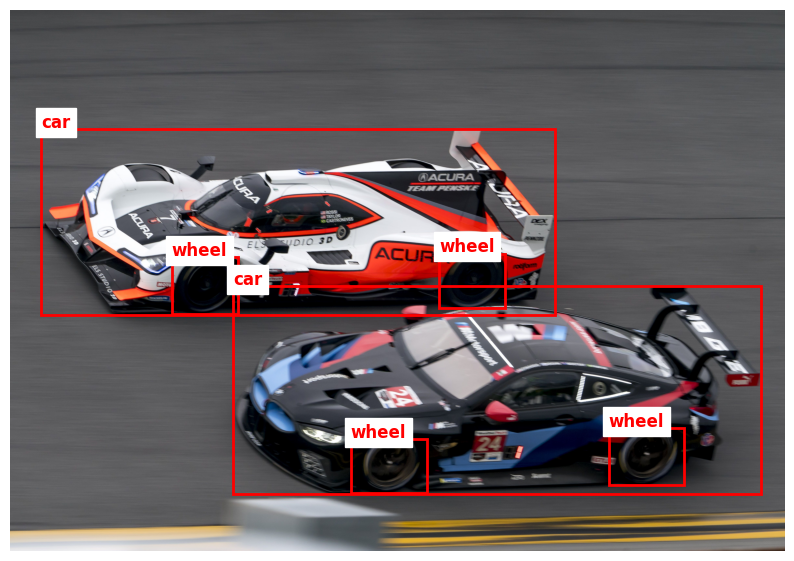

In [9]:
data = parsed_answer
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image)

# Parse bounding boxes and labels
bboxes = data['<OD>']['bboxes']
labels = data['<OD>']['labels']

for bbox, label in zip(bboxes, labels):
    x_min, y_min, x_max, y_max = bbox
    width = x_max - x_min
    height = y_max - y_min
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    ax.text(x_min, y_min - 10, label, color='red', fontsize=12, weight='bold', backgroundcolor='white')
plt.axis('off')
plt.show()